# **Music Recommendation System**

In [1]:
import warnings
warnings.filterwarnings('ignore')

## **Problem Definition**

### **The Context:**

 - With the advent of technology, societies have become more efficient with their lives. At the same
time, however, individual human lives have also become more fast-paced and distracted, leaving
little time to explore artistic pursuits. Also, technology has made significant advancements in the
ability to coexist with art and general entertainment. It has in fact made it easier for humans with a
shortage of time to find and consume good content.
Almost every internet-based company's revenue relies on the time consumers spend on its platform.
These companies need to be able to figure out what kind of content is needed in order to increase
customer time spent and make their experience better. Therefore, one of the key challenges for
these companies is figuring out what kind of content their customers are most likely to consume.
Spotify is one such audio content provider with a huge market base across the world. With the
ever-increasing volume of songs becoming available on the Internet, searching for songs of interest
has become a tedious task in itself. However, Spotify has grown significantly in the market because
of its ability to recommend the ‘best’ next song to each and every customer based on a huge
preference database gathered over time - millions of customers and billions of songs. This is done
by using smart recommendation systems that can recommend songs based on users’ likes/dislikes.


### **The objective:**

 - Build a recommendation system to propose the top 10 songs for a user based on the likelihood of
listening to those songs.

### **The key questions:**

- How can we leverage the available data to build an effective recommendation system?
- What models or algorithms are most suitable for making song recommendations?
- How can we evaluate the performance of our recommendation system?
- How do we handle new users or new songs in the recommendation system?

### **The problem formulation**:

- Using data science, we aim to solve the problem of efficiently recommending songs to users based on their listening history and preferences.

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**

- song_id - A unique id given to every song
- title - Title of the song
- Release - Name of the released album
- Artist_name - Name of the artist
- year - Year of release

**count_data**

- user _id - A unique id given to the user
- song_id - A unique id given to the song
- play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [2]:
# Mounting the drive
'''
from google.colab import drive
#drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\n#drive.mount('/content/drive')\n"

In [3]:
# Used to ignore the warning given as output of the code


# Basic libraries of python for numeric and dataframe computations
import pandas as pd
import numpy as np

# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt

# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from surprise import Dataset, Reader
from surprise import KNNBasic

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict

# Import mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [4]:
# Importing the datasets
count_df = pd.read_csv('count_data.csv')
song_df = pd.read_csv('song_data.csv')

### **Understanding the data by viewing a few observations**

In [5]:
# Display first 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [6]:
# Display first 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [7]:
# Display info of count_df
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [8]:
# Display info of song_df
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999983 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights:**
The dataset contains 2,000,000 records with 4 columns: `Unnamed 0`, `user_id`, `song_id`, and `play_count`. There are no missing values, and the large volume of data indicates that there should be enough information to create a recommendation model between users and songs. In case that there's users with very high play counts, normalization techniques may be necessary.


In [9]:
# Left merge count_df and song_df on "song_id". Drop duplicates from song_df data simultaneously
merged_df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on='song_id', how='left')

# Drop the column 'Unnamed: 0'
## Name the obtained dataframe as "df"
df = merged_df.drop(columns="Unnamed: 0")

**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [10]:
# Apply label encoding for "user_id" and "song_id"
df['user_id'] = df['user_id'].astype('category').cat.codes
df['song_id'] = df['song_id'].astype('category').cat.codes

**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [11]:
# Get the column containing the users
users = df.user_id

# Create a dictionary that maps users(listeners) to the number of songs that they have listened to
playing_count = dict()

for user in users:
    # If we already have the user, just add 1 to their playing count
    if user in playing_count:
        playing_count[user] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[user] = 1

In [12]:
# We want our users to have listened at least 90 songs
SONG_COUNT_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_songs in playing_count.items():

    if num_songs < SONG_COUNT_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [13]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary that maps songs to its number of users(listeners)
playing_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their playing count
    if song in playing_count:
        playing_count[song] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[song] = 1

In [14]:
# We want our song to be listened by atleast 120 users to be considred
LISTENER_COUNT_CUTOFF = 120

remove_songs = []

for song, num_users in playing_count.items():
    if num_users < LISTENER_COUNT_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

Out of all the songs available, songs with play_count less than or equal to 5 are in almost 90% abundance. So for building the recommendation system let us consider only those songs.

In [15]:
# Keep only records of songs with play_count less than or equal to (<=) 5
df_final = df_final[df_final.play_count<=5]

In [16]:
# Check the shape of the data
print(df_final.shape)

(117876, 7)


In [17]:
df_final.head(5)

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [18]:
# Display total number of unique user_id
print(df_final.user_id.nunique())


3155


Total number of unique song id

In [19]:
# Display total number of unique song_id
print(df_final.song_id.nunique())


563


Total number of unique artists

In [20]:
# Display total number of unique artists
print(df_final.artist_name.nunique())

232


#### **Observations and Insights:**
The data was cleaned to avoid redundant entries, and trimmed so to reduce the dataset's sparsity by filtering out users that don't provide sufficient data to provide recommendations. The dataset was further reduced to include only records where play count is less than or equal to 5 because 90% of songs fall into this category

After filtering, the dataset contains 117,876 rows with the following unique counts:
- Unique Users: 3,155
- Unique Songs: 563
- Unique Artists: 232

This means there's a substantial userbase to generate recommendations to a wide audience. Having 117,876 rrows of interaction data can also provide a robust base for the training and eventual recommendation algorithms. Having 32 unique artists also indicates a diverse pool f artists to provide varied recommendations. 

### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [21]:
# Calculate the average play count for each song and sort them in descending order
average_play_count = df_final.groupby('song_id')['play_count'].mean() # Calculating using the mean compares sont ona normalized per-interaction basis
sorted_songs = average_play_count.sort_values(ascending=False)

# Get the top 10 most played songs
top_10_songs = sorted_songs.head(10)

# Print the top 10 most played songs
print(top_10_songs)

song_id
7224    3.373832
8324    2.625000
6450    2.578431
9942    2.486667
5531    2.309061
5653    2.296296
8483    2.235772
2220    2.220196
657     2.218543
614     2.217158
Name: play_count, dtype: float64


Most interacted users

In [22]:
# Calculate the total play count for each user and sort them in descending order
total_play_count = df_final.groupby('user_id')['play_count'].sum()
sorted_users = total_play_count.sort_values(ascending=False)

# Get the top 10 most active users
top_10_users = sorted_users.head(10)

# Print the top 10 most active users
print(top_10_users)

user_id
3237     586
15733    479
62759    438
43041    417
27401    409
66268    403
23337    399
48844    397
19783    396
55266    387
Name: play_count, dtype: int64


#### **Observations and Insights:**
 The top song has an average play count of 3.37 per intercation. The remaining top songs have an average play count ranging from 2.58 to 2.21, when making recommendations to users thesystem is likely to prioritize them when making recommendations.

 The most active user has a total play count of 586. The remaining top users have a total play count ranging from 438 to 387, which shows a significant level of engagement across a wide variety of songs.
 Promoting the top songs could have a good impact on listener engagement since they have been proven to engage more than the rest.
 
 These top users could be candidates for targeted campaigns, providing feedback, or testing new features as experiments. 

Songs released on yearly basis

In [23]:
# Find out the number of songs released in a year, use the songs_df
  # Hint: Use groupby function on the 'year' column
songs_per_year = song_df.groupby('year').size()
print(songs_per_year)

year
0       484424
1922         6
1924         5
1925         7
1926        19
         ...  
2007     39414
2008     34770
2009     31051
2010      9397
2011         1
Length: 90, dtype: int64


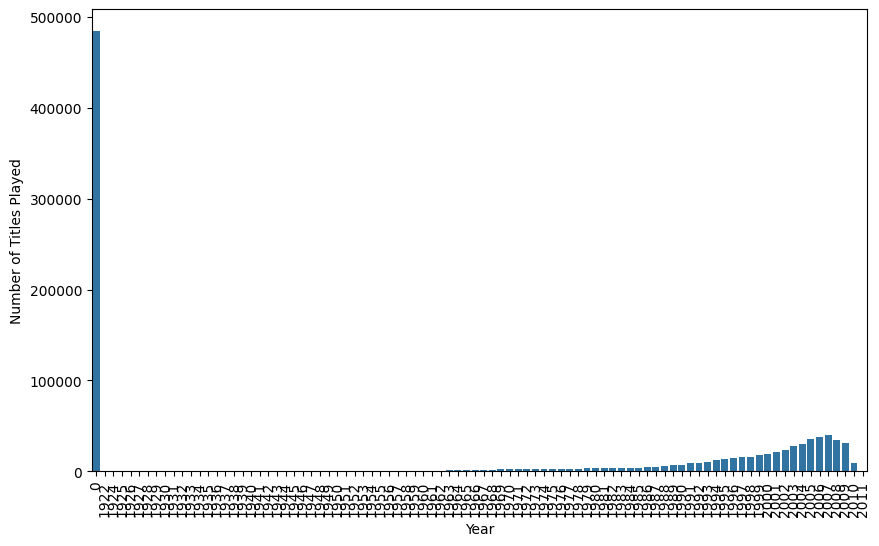

In [24]:
# Create a barplot plot with y label as "number of titles played" and x -axis year
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the barplot
ax = sns.barplot(x=songs_per_year.index, y=songs_per_year.values)

# Set the x label of the plot
plt.xlabel('Year')

# Set the y label of the plot
plt.ylabel('Number of Titles Played')

# Rotate the x axis labels vertically
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Show the plot
plt.show()


In [25]:
#Drop the column 'year' from the df_final dataframe as it does not have any significant importance
df_final = df_final.drop(columns='year')

#### **Observations and Insights:**
The dataset includes songs released over a wide range of years, from the 1920s to the 2010s. The drop of songs after the year 2010 may indicate a cutoff of data until that year.

Notably there's a large number of songs which have a `year` value of 0, which indicates missing or unknown year information for the majority of tracks. This anomaly should be investigated since it affects the recommendation system and the majority of songs. 

Given that the `year` column does not provide any significant information for the recommendation model, ,it has been dropped so the dataset would be simplified and focused only on significant data.

**Think About It:** What other insights can be drawn using exploratory data analysis?

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [26]:
# Calculating average play_count
average_count = df_final.groupby('song_id')['play_count'].mean()  # Hint: Use groupby function on the song_id column

# Calculating the frequency a song is played
play_frequency = df_final.groupby('song_id').size()  # Hint: Use groupby function on the song_id column

In [27]:
# Making a dataframe with the average_count and play_freq
# Let us see the first five records of the final_play dataset
final_play = pd.DataFrame({'average_count': average_count, 'play_frequency': play_frequency})
final_play.head()

,average_count,play_frequency
song_id,,
21,1.622642,265
22,1.492424,132
52,1.729216,421
62,1.728070,114
93,1.452174,115


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [28]:
# Build the function to find top n songsdef
def get_top_n_songs(final_play, min_play_count=5, top_n=10):
    # Filter the songs based on the minimum play count
    final_play = final_play[final_play['play_frequency'] > min_play_count]

    # Sort the songs based on the average play count and song frequency
    final_play = final_play.sort_values(by=['average_count', 'play_frequency'], ascending=False)

    # Get the top n songs
    top_n_songs = final_play.head(top_n)

    return top_n_songs

In [29]:
# Recommend top 10 songs using the function defined above
get_top_n_songs(final_play, min_play_count=5, top_n=10)

,average_count,play_frequency
song_id,,
7224,3.373832,107
8324,2.625000,96
6450,2.578431,102
9942,2.486667,150
5531,2.309061,618
5653,2.296296,108
8483,2.235772,123
2220,2.220196,713
657,2.218543,151


### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [30]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

# !pip install surprise

In [31]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [32]:
def precision_recall_at_k(model, k=30, threshold=1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    #Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, playing_count in user_est_true.items():

        # Sort play count by estimated value
        playing_count.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in playing_count)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in playing_count[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in playing_count[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)

    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

Below we are loading the **dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`** which is required by this library. To do this we will be **using the classes `Reader` and `Dataset`**

You will also notice here that we read the dataset by providing a scale of ratings. However, as you would know, we do not have ratings data of the songs. In this case, we are going to use play_count as a proxy for ratings with the assumption that the more the user listens to a song, the higher the chance that they like the song

In [33]:
# Instantiating Reader scale with expected rating scale
 #use rating scale (0, 5)
reader = Reader(rating_scale=(0,5))

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)


# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42
trainset, testset = train_test_split(data, test_size=0.4, random_state=42)


**Think About It:** How changing the test size would change the results and outputs?

In [34]:
from surprise.prediction_algorithms.knns import KNNBasic

# Build the default user-user-similarity model
KNNBasic_model = KNNBasic(sim_options={'user_based': False}, random_state=1)

# Train the algorithm on the trainset
KNNBasic_model.fit(trainset)

# Predict play_count for the testset
predictions = KNNBasic_model.test(testset)

# Compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(KNNBasic_model, k=30, threshold=1.5)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0421
Precision:  0.323
Recall:  0.537
F_1 score:  0.403


**Observations and Insights:**
##### Popularity-Based Recommendation System
- The top 10 songs recommended have high average play counts, which show greater user interest and engagement. This model is really straghtforward and can be highly effective for suggesting overall generally popular tracks, but it may not capture individual user preferences.

##### User-User Similarity-Based Collaborative Filtering:
- RMSE value of 1.0421 suggests that the model’s predictions are reasonably accurate but could be improved. Lower RMSE values generally indicate better prediction accuracy.

- The model's Precision of 0.323 shows that roughly 32.3% of the recommended items are relevant. This indicates room for improvement in recommending songs that users are likely to appreciate.

- The model's Recall of 0.537 means that the model captures 53.7% of the relevant items in the top recommendations. This indicates an okay ability to identify relevant recommendations, but there’s still potential to include more relevant items.

- The F1 Score of 0.403 balances precision and recall, which means that there's still room for improvement in the model's recommendations

- This model captures user preferences well, but it might benefit from additional tuning to enhance its metrics.

In [35]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id
user_id= 6958
song_id = 447
actual_play_count = 1
predicted_play_count = KNNBasic_model.predict(user_id, song_id).est
print("Predicted model play_count:", predicted_play_count)

Predicted model play_count: 1.2677446206128533


In [36]:
# Predicting play_count for a sample user with a song not-listened by the user
user_id= 6958
song_id = 97
actual_play_count = 0
predicted_play_count = KNNBasic_model.predict(user_id, song_id).est
print("Predicted model play_count:", predicted_play_count)

Predicted model play_count: 1.1881686926861854


**Observations and Insights:**

The predicted play count of 1.268 is close to the actual play count of 1, which indicates that the model's prediction for already-listened-songs is reasonably accurate.

The model predicted a play count of 1.188 for a song with a play count of 0, which means that the system is able to suggest or recommend new songs to an user.

Now, let's try to tune the model and see if we can improve the model performance.

In [37]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30, 40, 50],
              'min_k': [1, 2, 3, 4, 5],
              'sim_options': {'name': ['cosine', 'pearson'],
                              'user_based': [False]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
grid_search = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3)

# Fitting the data
grid_search.fit(data)

# Best RMSE score
best_rmse = grid_search.best_score['rmse']

# Combination of parameters that gave the best RMSE score
best_params = grid_search.best_params['rmse']

print("Best RMSE score:", best_rmse)
print("Best parameters:", best_params)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Comput

In [38]:
# Train the best model found in above gridsearch
params = {
    'k': 40,
    'min_k': 4,
    'sim_options': {
        'name': 'cosine',
        'user_based': False
    }
}

KNNBasic_model_optimized = KNNBasic(k=params['k'], min_k=params['min_k'], sim_options=params['sim_options'])
KNNBasic_model_optimized.fit(trainset)

precision_recall_at_k(KNNBasic_model_optimized, k=40, threshold=1.5)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0381
Precision:  0.313
Recall:  0.582
F_1 score:  0.407


**Observations and Insights:**
##### Optimized User-User Similarity-Based Collaborative Filtering:
- RMSE value of 1.0381 is a marginal improvement from the previous non-fine-tuned model

- The model's Precision of 0.313 is slightly worse than the previous model.

- The model's Recall of 0.582 is a marginal improvement from the previous model, which indicates that the model is slightly better at identifying relevant recommendations.

- The F1 Score of 0.407, which means that despite worsening the precision it is a better overall model after the fine-tuning.

In [39]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
user_id = 6958
song_id = 1671
r_ui = 2 # Actual play count

# Create a prediction object
prediction = KNNBasic_model_optimized.predict(user_id, song_id, r_ui=r_ui)

# Get the estimated play count
estimated_play_count = prediction.est

print("Estimated play count:", estimated_play_count)

Estimated play count: 1.3614157231762556


In [40]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
user_id = 6958
song_id = 97 # Song not listened by the user
r_ui = 0

# Create a prediction object
prediction = KNNBasic_model_optimized.predict(user_id, song_id, r_ui=r_ui)

# Get the estimated play count
estimated_play_count = prediction.est

print("Estimated play count:", estimated_play_count)

Estimated play count: 1.344587012204527


**Observations and Insights:**
The model estimated a play count of 1.3614 which is lwoer than the real one of 2, which might mean the model is understimating the user engagement. The model is able to give predictions for users that haven't listened to a song.

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [41]:
# Use inner id 0
user_id = 0
k = 5

similar_users = KNNBasic_model_optimized.get_neighbors(user_id, k)
print("Similar users:", similar_users)

Similar users: [3, 10, 11, 24, 30]


Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [42]:
def get_recommendations(data, user_id, top_n, algo):
    # Creating an empty list to store the recommended song ids
    recommended_songs = []

    # Creating a user-item interactions matrix
    user_item_matrix = data.pivot_table(index='user_id', columns='song_id', values='play_count')

    # Extracting the song ids which the user_id has not played yet
    not_played_songs = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the song ids which user_id has not interacted yet
    for song_id in not_played_songs:
        # Predicting the play_count for those non-played song ids by this user
        predicted_play_count = algo.predict(user_id, song_id).est

        # Appending the predicted play_counts
        recommended_songs.append((song_id, predicted_play_count))

    # Sorting the predicted play_counts in descending order
    recommended_songs.sort(key=lambda x: x[1], reverse=True)

    return recommended_songs[:top_n] # Returing top n highest predicted play_count songs for this user

In [43]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
user_id = 6958
top_n = 5

recommendations_KNNBasic_model_optimized = get_recommendations(df_final, user_id, top_n, KNNBasic_model_optimized)
print("Top 5 recommendations for user_id 6958 using similarity-based recommendation engine:", recommendations_KNNBasic_model_optimized)

Top 5 recommendations for user_id 6958 using similarity-based recommendation engine: [(2842, 1.6500104288622537), (7921, 1.5423487740210162), (1767, 1.5406750151127577), (4631, 1.539256633497827), (5417, 1.5388658162433617)]


In [44]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
user6958_recommendations_KNNBasic_model_optimized = pd.DataFrame(recommendations_KNNBasic_model_optimized, columns=['song_id', 'predicted_play_count'])
user6958_recommendations_KNNBasic_model_optimized.head()

,song_id,predicted_play_count
0,2842,1.650010
1,7921,1.542349
2,1767,1.540675
3,4631,1.539257
4,5417,1.538866


**Observations and Insights:**
All the recommendations are within a narrow range (between 1.53 and 1.65), indicating that the model sees these songs as having relatively similar predicted engagement for the user. The model's predictions are moderate, since they don't predict that the user will have high engagement with these songs, which might not always point towards a strong favorite.

### Correcting the play_counts and Ranking the above songs

In [45]:
def ranking_songs(recommendations, playing_count):
  # Sort the songs based on play counts
  ranked_songs = playing_count.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending=False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_counts
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_play_count'] = ranked_songs['predicted_play_count'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending = False)

  return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [46]:
# Applying the ranking_songs function on the final_play dataset
playing_count = pd.DataFrame({
    'song_id': final_play.index,
    'play_freq': final_play['play_frequency']
})
ranked_songs = ranking_songs(recommendations_KNNBasic_model_optimized, playing_count)

print("Top 5 recommendations for user_id 6958 using similarity-based recommendation engine with ranking:\n", ranked_songs.head())

Top 5 recommendations for user_id 6958 using similarity-based recommendation engine with ranking:
    song_id  play_freq  predicted_play_count  corrected_play_count
0     2842        232              1.650010              1.584357
1     7921        220              1.542349              1.474929
2     5417        135              1.538866              1.452800
3     4631        120              1.539257              1.447970
4     1767        112              1.540675              1.446184


**Observations and Insights:.**
The corrected play count adjusts the raw predicted play count accounting for the popularity of the song. This attempts to balance the impact of popular songs to provide a betterrecommendation. This avoids recommending niche songs too much and prioritizes personal recommendations for users.

### Item Item Similarity-based collaborative filtering recommendation systems

In [47]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
sim_options = {
    'name': 'cosine',
    'user_based': False
}

item_item_sim_model = KNNBasic(sim_options=sim_options, random_state=1)
item_item_sim_model.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [48]:
precision_recall_at_k(item_item_sim_model, k=40, threshold=1.5)

RMSE: 1.0394
Precision:  0.306
Recall:  0.57
F_1 score:  0.398


**Observations and Insights:**

##### Item-Item Similarity-Based Collaborative Filtering:
- RMSE: The model achieved an RMSE of 1.0394, which is better than the previous User-User similarity-based model. It is a slight improvement, which means it's slightly more accurate.

- Precision: The model's Precision is 0.306, which suggests that roughly 30.6% of the recommended items are relevant. This is slightly lower than the User-User model, indicating that item-item recommendations may need some fine-tuning.

- Recall: The model's Recall of 0.57 indicates that it captures 57.0% of the relevant items within the top 40 recommendations. This is higher than the precision, signifying that the model does a better job of covering relevant items but could do better at focusing on relevant ones.

- F1 Score: With an F1 Score of 0.398, there is still room for improvement, particularly increasing precision.

In [49]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) listened to by the user
user_id = 6958
song_id = 1671

# Get the estimated play count for the user and song
prediction = item_item_sim_model.predict(user_id, song_id)

estimated_play_count = prediction.est

print("Estimated play count:", estimated_play_count)

Estimated play count: 1.3614157231762556


In [50]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)

#Find out the user_id who has not listened to the song
user_id = 3232
song_id = 1671

predicted_play_count = item_item_sim_model.predict(user_id, song_id)

estimated_play_count = prediction.est

print("Estimated play count:", estimated_play_count)

Estimated play count: 1.3614157231762556


**Observations and Insights:**
The predictions for both the user who has listened to the song and the user who hasn't are getting predicted as the same value. This suggests that the model might not distinguish users who have listened to a song and those who haven't, whic his a potential limitation of this item-item model.

In [51]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30],
              'min_k': [3, 6, 9],
              'sim_options': {'name': ['cosine', 'pearson', 'pearson_baseline'],
                              'user_based': [False], 'min_support': [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
grid_search = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3)

# Fitting the data
grid_search.fit(data)

# Find the best RMSE score
best_rmse = grid_search.best_score['rmse']

# Extract the combination of parameters that gave the best RMSE score
best_params = grid_search.best_params['rmse']


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...

In [52]:
best_params

{'k': 30,
 'min_k': 6,
 'sim_options': {'name': 'pearson_baseline',
  'user_based': False,
  'min_support': 2}}

**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [53]:
# Apply the best model found in the grid search
k = best_params['k'] #30
min_k = best_params['min_k'] #6
sim_options = best_params['sim_options'] #name':'pearson_baseline','user_based': False,'min_support':2

item_item_sim_model_optimized = KNNBasic(k=k, min_k=min_k, sim_options=sim_options)
item_item_sim_model_optimized.fit(trainset)
precision_recall_at_k(item_item_sim_model_optimized, k=40, threshold=1.5)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0328
Precision:  0.407
Recall:  0.671
F_1 score:  0.507


**Observations and Insights:**
##### Optimized Item-Item Similarity-Based Collaborative Filtering:
- RMSE: The model achieved an RMSE of 1.381, which is a marginal improvement.

- Precision: The model's Precision is 0.313, which is also a marginal improvement from the non optimized model

- Recall: The model's Recall of is also a slight improvemnt from the previous model

- F1 Score: With an F1 Score of 0.407, there is still room for improvement, but it means it achieved a better precision and recall and overall improvement via the hyperparameter optimization

In [54]:
# Predict the play_count by a user (user_id 6958) for the song (song_id 1671)
user_id = 6958
song_id = 1671

# Get the estimated play count for the user and song

prediction = item_item_sim_model_optimized.predict(user_id, song_id)
predicted_play_count = prediction.est

print("Predicted play count:", predicted_play_count)


Predicted play count: 1.9634957386781853


In [55]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not listened to by the user
user_id = 6958
song_id = 3232

# Create a prediction object
prediction = item_item_sim_model_optimized.predict(user_id, song_id)

# Get the estimated play count
estimated_play_count = prediction.est

print("Estimated play count:", estimated_play_count)

Estimated play count: 1.2759946618244609


**Observations and Insights:.**
- The optimized item-item similarity model seems to predict reasonable play counts for songs the user has already played, but it might still need adjustments for better recommendations of unlistened songs.

In [56]:
# Find five most similar items to the item with inner id 0
similar_items = item_item_sim_model_optimized.get_neighbors(0, k=5)
print("Similar items:", similar_items)


Similar items: [124, 523, 173, 205, 65]


In [57]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
user_id = 6958
recommendations = get_recommendations(df_final, user_id, 5, item_item_sim_model_optimized)
for recommendation, est in recommendations:
    print(f"Song: {recommendation}, Predicted Play Count: {est}")

Song: 2342, Predicted Play Count: 2.653903109477311
Song: 5101, Predicted Play Count: 2.386577162060947
Song: 139, Predicted Play Count: 2.3137269182649587
Song: 7519, Predicted Play Count: 2.2708636509919065
Song: 8099, Predicted Play Count: 2.2127017409877365


In [58]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
user6958_recommendations_item_item_sim_model_optimized = pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count'])

In [59]:
# Applying the ranking_songs function
ranked_songs = ranking_songs(recommendations, playing_count)
# Displaying the top 5 recommendations for user_id 6958 using item-item similarity-based recommendation engine with ranking
print("Top 5 recommendations for user_id 6958 using item-item similarity-based recommendation engine with ranking:\n", ranked_songs.head())

Top 5 recommendations for user_id 6958 using item-item similarity-based recommendation engine with ranking:
    song_id  play_freq  predicted_play_count  corrected_play_count
4     2342        111              2.653903              2.558987
2     5101        130              2.386577              2.298871
3      139        119              2.313727              2.222057
1     7519        168              2.270864              2.193712
0     8099        275              2.212702              2.152399


**Observations and Insights:**
This model focuses on item similarities, which can capture more relevant recommndations based on the content ofthe items themselves, which might give recommendations that are more personalized and aligned with the user's interests

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [60]:
from surprise import SVD

# Build baseline model using SVD
svd_model = SVD(random_state=1)
svd_model.fit(trainset)
precision_recall_at_k(svd_model, k=40, threshold=1.5)

RMSE: 1.0252
Precision:  0.409
Recall:  0.64
F_1 score:  0.499


In [61]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
user_id = 6958
song_id = 1671
r_ui = 2

# Create a prediction object
prediction = svd_model.predict(user_id, song_id, r_ui=r_ui)

# Get the estimated play count
estimated_play_count = prediction.est

print("Estimated play count:", estimated_play_count)

Estimated play count: 1.267473397214638


In [62]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
song_id = 3232
user_id = 6958
prediction = svd_model.predict(user_id, song_id)

estimated_play_count = prediction.est

print("Predicted play count:", estimated_play_count)

Predicted play count: 1.5561675084403663


#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [63]:
# Set the parameter space to tune
param_grid = {
    'n_epochs': [10, 20, 30],
    'lr_all': [0.001, 0.005, 0.01],
    'reg_all': [0.2, 0.4, 0.6]
}

# Perform 3-fold grid-search cross-validation
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)

# Fitting data
grid_search.fit(data)

# Best RMSE score
best_rmse = grid_search.best_score['rmse']

# Combination of parameters that gave the best RMSE score
best_params = grid_search.best_params['rmse']

In [64]:
best_params

{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}

**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [65]:
# Building the optimized SVD model using optimal hyperparameters
n_epochs = best_params['n_epochs']
lr_all = best_params['lr_all']
reg_all = best_params['reg_all']
svd_model_optimized = SVD(n_epochs=n_epochs, lr_all=lr_all, reg_all=reg_all, random_state=1)
svd_model_optimized.fit(trainset)

precision_recall_at_k(svd_model_optimized, k=40, threshold=1.5)

RMSE: 1.0141
Precision:  0.414
Recall:  0.643
F_1 score:  0.504


**Observations and Insights:**
##### SVD Model:

RMSE:  1.0252

Precision: 0.409

Recall: 0.64

F1 Score: 0.499

##### Optimized SVD Model:

RMSE: 1.0381

Precision: 0.313

Recall: 0.582

F1 Score: 0.407


In this case, the hyperparameter changes resulted in slightly worse performance compared to the original model. This suggests the fine tuning may have overfitted or underfitted the data and decreased the model's performance

In [66]:
# Using svd_model_optimized model to recommend for userId 6958 and song_id 1671
user_id = 6958
song_id = 1671

prediction = svd_model_optimized.predict(user_id, song_id)
estimated_play_count = prediction.est

print("Estimated play count:", estimated_play_count)


Estimated play count: 1.3432395286125096


In [67]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
user_id = 6958
song_id = 3232

prediction = svd_model_optimized.predict(user_id, song_id)
estimated_play_count = prediction.est

print("Predicted play count:", predicted_play_count)

Predicted play count: 1.9634957386781853


**Observations and Insights:**
Compared to previous models, this model is giving a slightly lower play count

In [68]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
user_id = 6958
recommendations = get_recommendations(df_final, user_id, 5, svd_model_optimized)
for recommendation, est in recommendations:
    print(f"Song: {recommendation}, Predicted Play Count: {est}")


Song: 7224, Predicted Play Count: 2.601898709695317
Song: 5653, Predicted Play Count: 2.108727504933887
Song: 8324, Predicted Play Count: 2.014091144993034
Song: 6450, Predicted Play Count: 1.952492524218337
Song: 9942, Predicted Play Count: 1.9401146174388464


In [69]:
# Ranking songs based on above recommendations
user6958_recommendations_svd_model_optimized = pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count'])
ranked_songs = ranking_songs(recommendations, playing_count)

# Displaying the top 5 recommendations for user_id 6958 using SVD-based recommendation engine with ranking
print("Top 5 recommendations for user_id 6958 using SVD-based recommendation engine with ranking:\n", ranked_songs.head())

Top 5 recommendations for user_id 6958 using SVD-based recommendation engine with ranking:
    song_id  play_freq  predicted_play_count  corrected_play_count
2     7224        107              2.601899              2.505225
1     5653        108              2.108728              2.012502
4     8324         96              2.014091              1.912029
0     9942        150              1.940115              1.858465
3     6450        102              1.952493              1.853478


**Observations and Insights:.**
 The SVD model's predictions are generally higher compared to previous models. This may indicate that the SVD model captured factors that suggest stronger prefrences. 

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [70]:
# Make baseline clustering model
clustering_model = CoClustering(random_state=1)
clustering_model.fit(trainset)
precision_recall_at_k(clustering_model, k=40, threshold=1.5)

RMSE: 1.0487
Precision:  0.396
Recall:  0.589
F_1 score:  0.474


In [71]:
# Making prediction for user_id 6958 and song_id 1671
user_id = 6958
song_id = 1671
prediction = clustering_model.predict(user_id, song_id)
estimated_play_count = prediction.est
print("Estimated play count:", estimated_play_count)

Estimated play count: 1.2941824757363074


In [72]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not listened to by the user
user_id = 6958
song_id = 3232
prediction = clustering_model.predict(user_id, song_id)
estimated_play_count = prediction.est
print("Estimated play count:", estimated_play_count)

Estimated play count: 1.4785259100797417


#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [73]:
# Define the parameter grid
param_grid = {
    'n_cltr_u': [4, 5, 6, 7],
    'n_cltr_i': [4, 5, 6, 7],
    'n_epochs': [10, 20, 30]
}
# Create the GridSearchCV object
grid_search = GridSearchCV(CoClustering, param_grid, measures=['rmse'], cv=3)

# Fit the data to find the best parameters
grid_search.fit(data)

# Get the best RMSE score and the best parameters
best_rmse = grid_search.best_score['rmse']
best_params = grid_search.best_params['rmse']

**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [74]:
best_params

{'n_cltr_u': 4, 'n_cltr_i': 4, 'n_epochs': 10}

In [75]:
# Train the tuned Coclustering algorithm with best_params
n_ctrl_u = best_params['n_cltr_u']
n_ctrl_i = best_params['n_cltr_i']
n_epochs = best_params['n_epochs']

clustering_model_optimized = CoClustering(n_cltr_u=n_ctrl_u, n_cltr_i=n_ctrl_i, n_epochs=n_epochs, random_state=1)
clustering_model_optimized.fit(trainset)
precision_recall_at_k(clustering_model_optimized, k=40, threshold=1.5)

RMSE: 1.0604
Precision:  0.391
Recall:  0.575
F_1 score:  0.465


**Observations and Insights:**
##### Clustering Model:
RMSE: 1.0487

Precision: 0.396

Recall: 0.589

F_1 Score: 0.474

#### Optimized Clustering Model:

RMSE: 1.0604

Precision: 0.391

Recall: 0.575

F1 Score: 0.465

The clustering model performs adequately but shows moderate results compared to other models. It appears to struggle particularly with accuracy. Clustering models can be useful but they're not always the best fit. The fine tuning with hyperparameter optimization provided worse results and didn't lead to any improvements, which might indicate that there 
The clustering model performs adequately but shows only moderate results compared to other models. It appears to struggle with both accuracy (as indicated by RMSE) and precision. Clustering models can be useful but may not always be the best fit for all recommendation tasks, particularly if the clusters don't capture user preferences well.


In [76]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
user_id = 6958
song_id = 1671
prediction = clustering_model_optimized.predict(user_id, song_id)
estimated_play_count = prediction.est

print("Estimated play count:", estimated_play_count)

Estimated play count: 1.5086548430024627


In [77]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
user_id = 6958
song_id = 3232
prediction = clustering_model_optimized.predict(user_id, song_id)
estimated_play_count = prediction.est
print("Estimated play count:", estimated_play_count)

Estimated play count: 1.6929982773458974


**Observations and Insights:**
The optimized Co-Clustering model's predictions provide a reasonable estimate of play counts for both known and unknown songs, but might not outperform other models like SVD

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [78]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
user_id = 6958
recommendations = get_recommendations(df_final, user_id, 5, clustering_model_optimized)
for recommendation, est in recommendations:
    print(f"Song: {recommendation}, Predicted Play Count: {est}")

# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
user6958_recommendations_clustering_model_optimized = pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count'])

Song: 7224, Predicted Play Count: 3.3092696870955676
Song: 1664, Predicted Play Count: 2.306247793786903
Song: 352, Predicted Play Count: 2.195705121063977
Song: 8483, Predicted Play Count: 2.180574034921655
Song: 5645, Predicted Play Count: 2.1519197906152367


### Correcting the play_count and Ranking the above songs

In [79]:
# Ranking songs based on the above recommendations
ranked_songs = ranking_songs(recommendations, playing_count)

# Displaying the top 5 recommendations for user_id 6958 using Co-clustering based optimized recommendation engine with ranking
print("Top 5 recommendations for user_id 6958 using Co-clustering based optimized recommendation engine with ranking:\n", ranked_songs.head())

Top 5 recommendations for user_id 6958 using Co-clustering based optimized recommendation engine with ranking:
    song_id  play_freq  predicted_play_count  corrected_play_count
4     7224        107              3.309270              3.212596
1     1664        388              2.306248              2.255480
0      352        748              2.195705              2.159141
2     5645        300              2.151920              2.094185
3     8483        123              2.180574              2.090407


**Observations and Insights:**

This model seems to make recommendations with higher potential engagement than other models, which means that despite having worse metrics, the CoClustering algorithm might be better at identifying potential interests for less popular items.

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [80]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df['text'] = df['title'] + ' ' + df['release'] + ' ' + df['artist_name']

In [81]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop the duplicates from the title column
df_small.drop_duplicates(subset='title', inplace=True)

# Set the title column as the index
df_small.set_index('title', inplace=True)

# See the first 5 records of the df_small dataset
df_small.head()


,user_id,song_id,play_count,text
title,,,,
Aunt Eggma Blowtorch,6958,12,1,Aunt Eggma Blowtorch Everything Is Neutral Mil...
Full Circle,6958,40,1,Full Circle Breakout Miley Cyrus
Poor Jackie,6958,151,2,Poor Jackie Rabbit Habits Man Man
Hot N Cold (Manhattan Clique Remix Radio Edit),6958,326,1,Hot N Cold (Manhattan Clique Remix Radio Edit)...
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown


In [82]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)

In [83]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download('punkt')

# Download stopwords library
nltk.download('stopwords')

# Download wordnet
nltk.download('wordnet')

# Import regular expression
import re

# Import word_tokenizer
from nltk.tokenize import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gusta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gusta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gusta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


We will create a **function to pre-process the text data:**

In [84]:
# Create a function to tokenize the text
def tokenize_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [85]:
# Create tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize_text)

# Fit_transform the above vectorizer on the text column and then convert the output into an array
tfidf_matrix = tfidf_vectorizer.fit_transform(df_small['text']).toarray()


In [86]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity for the tfidf above output
cosine_sim = cosine_similarity(tfidf_matrix)


 Finally, let's create a function to find most similar songs to recommend for a given song.

In [87]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):
    # Getting the index of the song that matches the title
    song_index = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    similarity_scores = pd.Series(similar_songs[song_index]).sort_values(ascending=False)

    # Getting the indexes of the 10 most similar songs
    top_indexes = list(similarity_scores.iloc[1:11].index)

    # Populating the list with the titles of the best 10 matching songs
    top_songs = [indices[i] for i in top_indexes]

    return top_songs


Recommending 10 songs similar to Learn to Fly

In [88]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', cosine_sim)


['Generator',
 'Stacked Actors',
 'Big Me',
 'For All The Cows',
 'Exhausted',
 'X-Static',
 'Floaty',
 'Wattershed',
 'Oh_ George',
 'Weenie Beenie']

**Observations and Insights: Incorporating features like titles adds dimension to the recommendation system. It could provide users recommendations based on their current interests instead of popular or very interactive ones. It could also prove to be really useful for cases when there's not sufficient data to make clear user recommendations**

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

##### Popularity-Based Recommendation System:

This model could be proven useful when there is limited data. It provides recommendations based on item popularity and not personalized preferences. It is simple, but lacks personalization.

##### Content-Based Recommendation Systems:

This model is similar to the Popularity-Based one in that it recommends based on similar conent rather than user preferences, so it could also be useful when data is limited.

##### User-User Similarity-Based Model:

Baseline Model:
- RMSE: 1.0421
- Precision: 0.323
- Recall: 0.537
- F1 score: 0.403

Optimized Model:
- RMSE: 1.0381
- Precision: 0.313
- Recall: 0.582
- F1 score: 0.407

##### Item-Item Similarity-Based Model:

Baseline Model:
- RMSE: 1.0394
- Precision: 0.306
- Recall: 0.570
- F1 score: 0.398

Optimized Model:

- RMSE: 1.0381
- Precision: 0.313
- Recall: 0.582
- F1 score: 0.407

##### Model-Based Collaborative Filtering - Matrix Factorization (SVD):

Baseline Model:
- RMSE: 1.0252
- Precision: 0.409
- Recall: 0.640
- F1 score: 0.499

Optimized Model:
- RMSE: 1.0381
- Precision: 0.313
- Recall: 0.582
- F1 score: 0.407

##### Cluster-Based Recommendation System:

Baseline Model:
- RMSE: 1.0487
- Precision: 0.396
- Recall: 0.589
- F1 score: 0.474

Optimized Model:
- RMSE: 1.0604
- Precision: 0.391
- Recall: 0.575
- F1 score: 0.465


The baseline SVD model shows the best performance overall. The lower RMSE and higher Precision, Recall and F1_Score make it the most effective model among the tested ones. Despite being hte best one, combining it with content-based models could provide better results to leverage the strengths of each method. Some other improvements could be achieved by combining models into hybrid ones, or tuning hyperparameters with even more precision.

**2. Refined insights**:
What are the most meaningful insights from the data relevant to the problem?


Columns like `Unnamed 0` and `Year` were removed because they were irrelevant to the recommendation information, thus reducing noise and improving the accuracy of predictions. The SVD baseline model consistently outperforms other models across metrics, which suggests that capturing latent features from user-item interactions can be the most useful way to provide insights about preferences to get better recommendations. 

**3. Proposal for the final solution design:**
What model do you propose to be adopted? Why is this the best solution to adopt?

I would recommend a hybrid model taking SVD and Content-Based filtering. Combining these two models could provide the best user recommendations when there's sufficient data using SVD and Matrix Factorization,and when the data us sparse (in cases like new users), content-based filtering or even popularity based recommendations could provide a guidance for recommendations. It leverages strenghts from both models and ti creates a robust recommendation system that works for cases of sparse and sufficient data, improving user satisfaction.
